# Probabilidad y Estadística (C)

**2019 - 2doC**

---

> # Trabajo en laboratorio 4to encuentro:

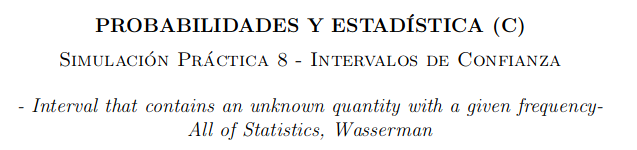

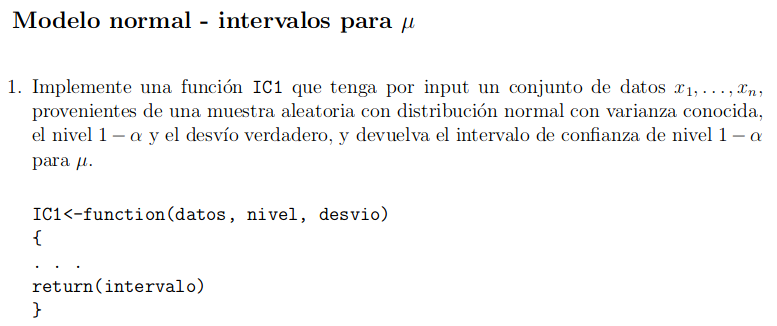

In [0]:
IC1  <- function (datos, nivel, sigma_0){
    # Intervalo para mu, sigma conocido
    #     datos : {x1, x2,..., xn}
    #     nivel : 1-alpha
    #     sigma_0: desvio conocido
    prom <- mean(datos)
    n <- length(datos)
    alpha <- 1.0-nivel
    zp <- -qnorm( alpha / 2 )
    IC <- c( prom - zp * sigma_0 / sqrt(n) ,
             prom + zp * sigma_0 / sqrt(n) )
    return (IC)
}

In [0]:
#Generate random data
datos <- rnorm(100, mean=7, sd=1)

In [89]:
intervalo <- IC1(datos=datos,
                  nivel=0.95,
                  sigma_0=1.0)

print("Intervalo de Confianza:", quote=FALSE)

intervalo

[1] Intervalo de Confianza:


[1] 6.857244 7.249237

In [90]:

longitud <- intervalo[2] - intervalo[1]
longitud

[1] 0.3919928

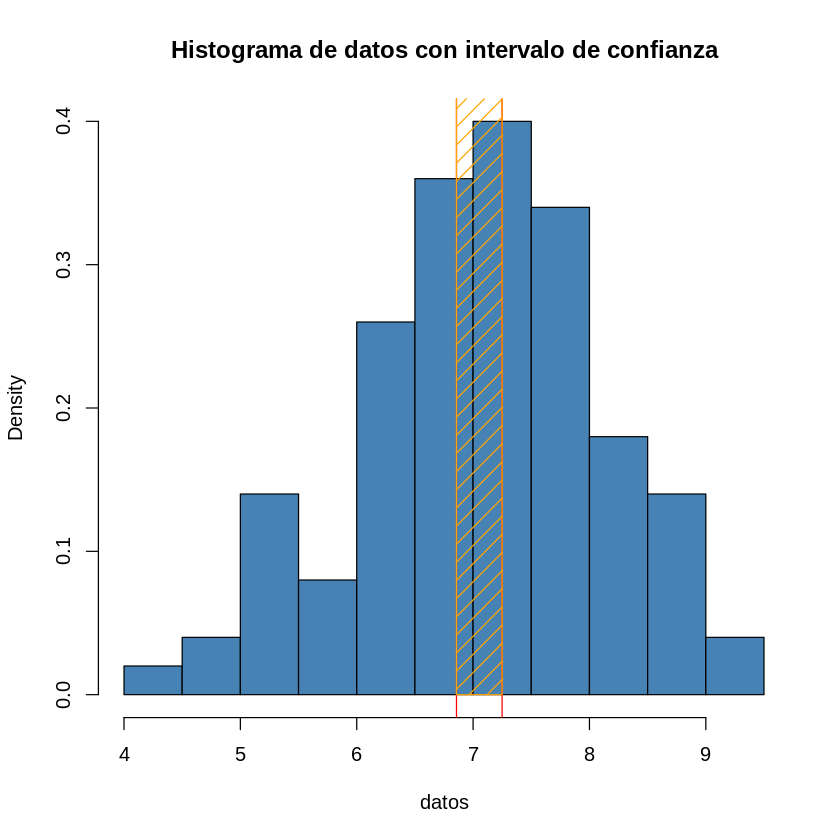

In [91]:
hist(datos, main="Histograma de datos con intervalo de confianza",
            freq=FALSE, col="steelblue")
abline(v=intervalo, col="red")
rect(xleft  = intervalo[1],
     xright = intervalo[2],
     ybottom=0, 
     ytop=0.5,
     density=10,
     col="orange")

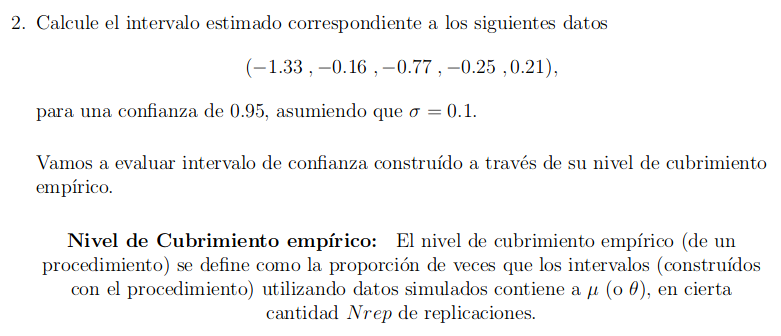

In [92]:
datos <- c(-1.33,-0.16,-0.77,-0.25,0.21)
datos

[1] -1.33 -0.16 -0.77 -0.25  0.21

In [93]:
intervalo <- IC1(datos=datos,
                  nivel=0.95,
                  sigma_0=0.1)

print("Intervalo de Confianza:", quote=FALSE)

intervalo

[1] Intervalo de Confianza:


[1] -0.5476523 -0.3723477

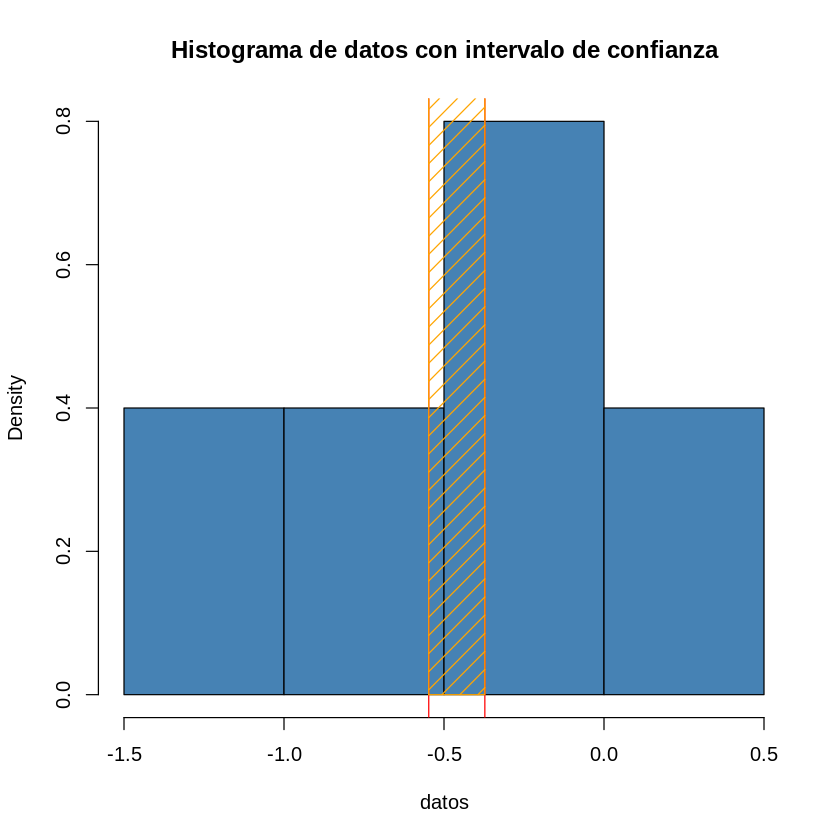

In [94]:
hist(datos, main="Histograma de datos con intervalo de confianza",
            freq=FALSE, col="steelblue")
abline(v=intervalo, col="red")
rect(xleft  = intervalo[1],
     xright = intervalo[2],
     ybottom=0, 
     ytop=1,
     density=10,
     col="orange")

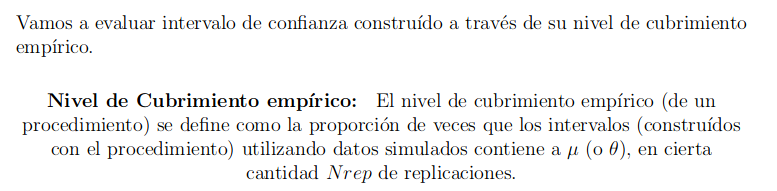

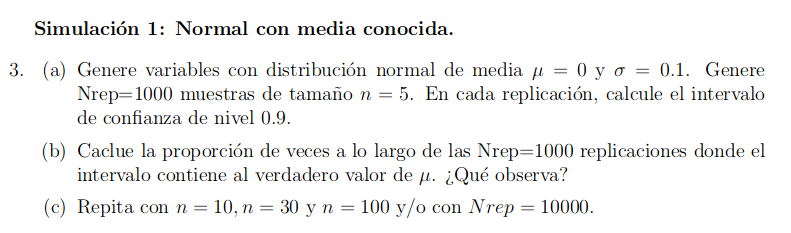

# Nrep = 1.000

In [95]:
# a) Genero 100 porque se ven mejor los intervalos en cada plot
Nrep <- 100
data <- replicate(n=Nrep, expr=IC1(rnorm(5, mean=0, sd=0.1), nivel=0.90, sigma_0=0.1 ) )
data <- t(data) # Traspongo a 2 columnas de datos
colnames(data) <- c("Izq", "Der")
print("Data dimension:", quote=FALSE)
dim(data)

print("head(data):", quote=FALSE)
print(head(data))



[1] Data dimension:


[1] 100   2

[1] head(data):
             Izq        Der
[1,] -0.03001317 0.11710701
[2,] -0.02587922 0.12124096
[3,] -0.04451569 0.10260450
[4,] -0.07531606 0.07180412
[5,] -0.12961439 0.01750579
[6,] -0.04083624 0.10628394


In [96]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0 & der >=0){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.95

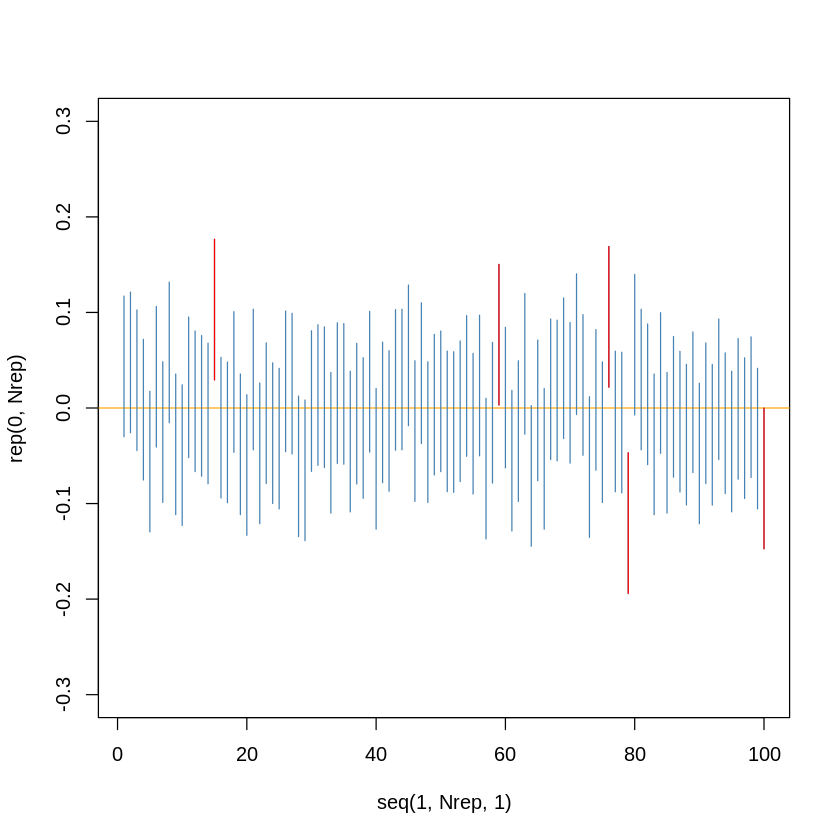

In [97]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(-0.3,0.3))

abline(h=0, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

segments(x0=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         x1=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y0=data[,'Izq'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y1=data[,'Der'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         col="red")
idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0 & der >=0)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

# n = 10

In [0]:
# n=10
n <- 10
data <- replicate(n=Nrep, expr=IC1(rnorm(n, mean=0, sd=0.1), nivel=0.90, sigma_0=0.1 ) )
data <- t(data)
colnames(data) <- c("Izq","Der")

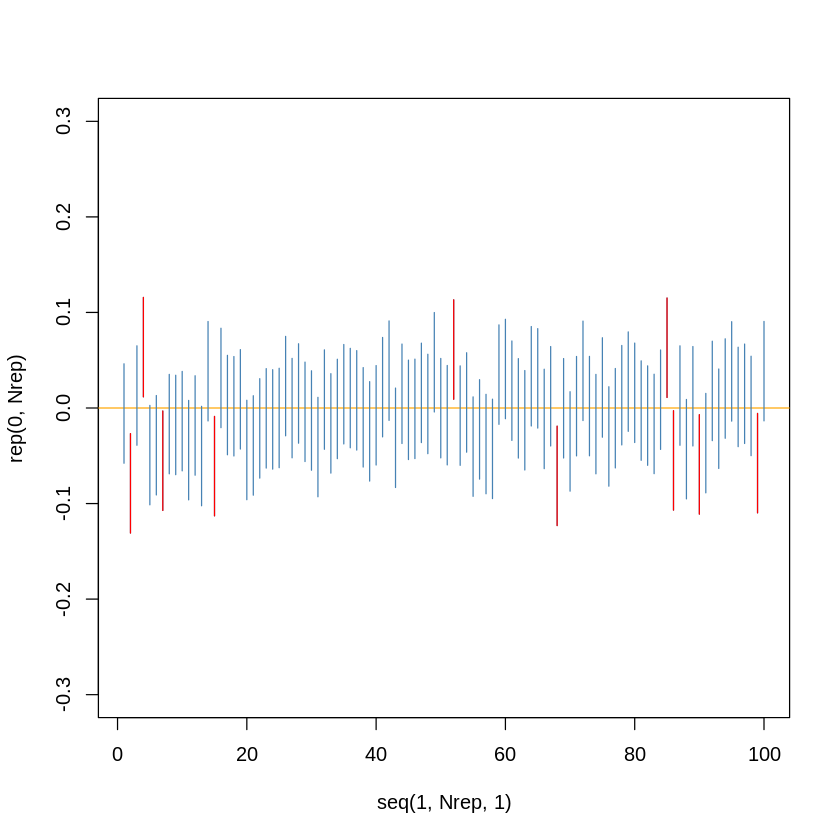

In [99]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(-0.3,0.3))

abline(h=0, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

segments(x0=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         x1=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y0=data[,'Izq'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y1=data[,'Der'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         col="red")
idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0 & der >=0)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

In [100]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0 & der >=0){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.9

# n = 30

In [0]:
n <- 30
data <- replicate(n=Nrep, expr=IC1(rnorm(n, mean=0, sd=0.1), nivel=0.90, sigma_0=0.1 ) )
data <- t(data)
colnames(data) <- c("Izq","Der")

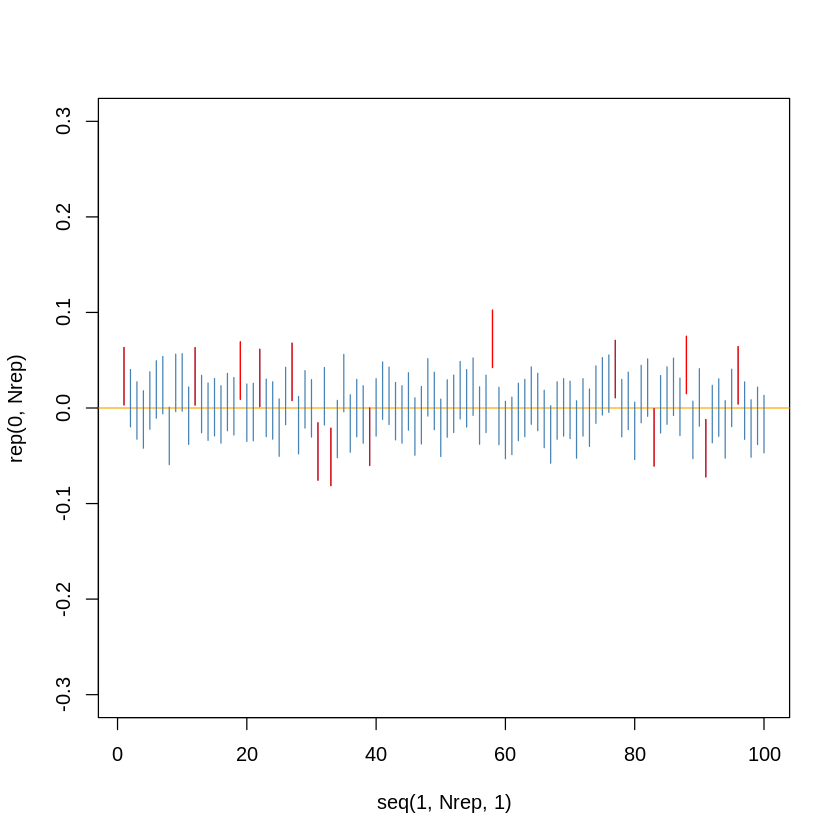

In [102]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(-0.3,0.3))

abline(h=0, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

segments(x0=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         x1=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y0=data[,'Izq'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y1=data[,'Der'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         col="red")
idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0 & der >=0)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

In [103]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0 & der >=0){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.86

# n = 100

In [0]:
n <- 100
data <- replicate(n=Nrep, expr=IC1(rnorm(n, mean=0, sd=0.1), nivel=0.90, sigma_0=0.1 ) )
data <- t(data)
colnames(data) <- c("Izq","Der")

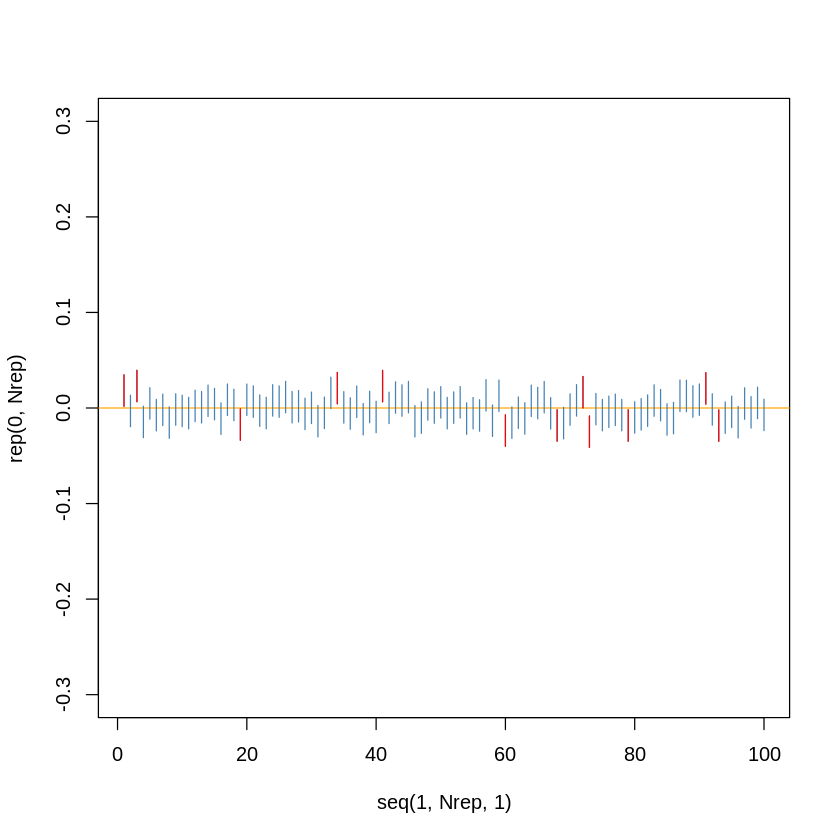

In [105]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(-0.3,0.3))

abline(h=0, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

segments(x0=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         x1=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y0=data[,'Izq'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y1=data[,'Der'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         col="red")
idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0 & der >=0)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

In [106]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0 & der >=0){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.88

# Nrep = 10.000

#n = 5

In [107]:
# a) Genero 10000
Nrep <- 10000
data <- replicate(n=Nrep, expr=IC1(rnorm(5, mean=0, sd=0.1), nivel=0.90, sigma_0=0.1 ) )
data <- t(data) # Traspongo a 2 columnas de datos
colnames(data) <- c("Izq", "Der")
print("Data dimension:", quote=FALSE)
dim(data)

print("head(data):", quote=FALSE)
print(head(data))



[1] Data dimension:


[1] 10000     2

[1] head(data):
             Izq         Der
[1,] -0.05743881  0.08968137
[2,] -0.05555988  0.09156031
[3,] -0.10476933  0.04235085
[4,] -0.03474011  0.11238007
[5,] -0.13252047  0.01459971
[6,] -0.16499033 -0.01787015


In [108]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0 & der >=0){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.8972

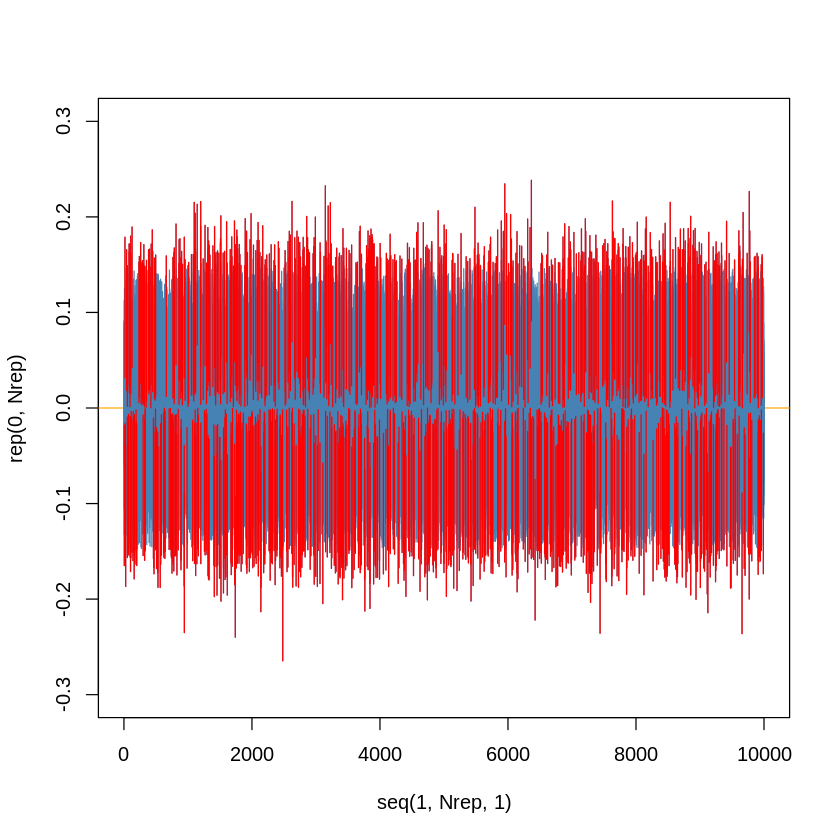

In [109]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(-0.3,0.3))

abline(h=0, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

segments(x0=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         x1=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y0=data[,'Izq'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y1=data[,'Der'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         col="red")
idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0 & der >=0)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

# n = 10

In [0]:
# n=10
n <- 10
data <- replicate(n=Nrep, expr=IC1(rnorm(n, mean=0, sd=0.1), nivel=0.90, sigma_0=0.1 ) )
data <- t(data)
colnames(data) <- c("Izq","Der")

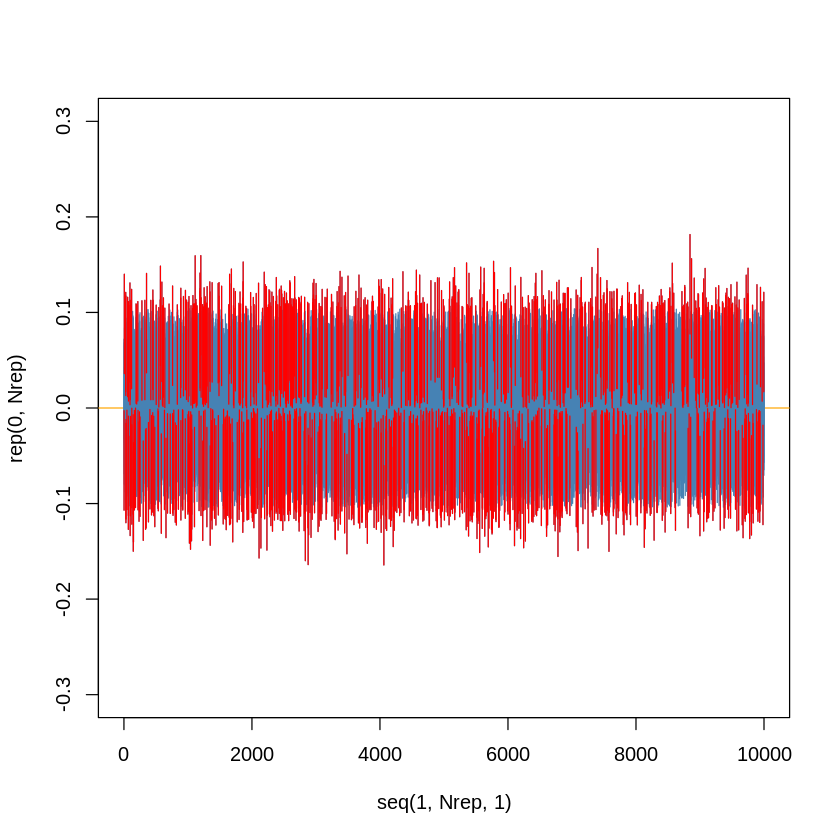

In [111]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(-0.3,0.3))

abline(h=0, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

segments(x0=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         x1=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y0=data[,'Izq'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y1=data[,'Der'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         col="red")
idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0 & der >=0)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

In [112]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0 & der >=0){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.9046

# n = 30

In [0]:
n <- 30
data <- replicate(n=Nrep, expr=IC1(rnorm(n, mean=0, sd=0.1), nivel=0.90, sigma_0=0.1 ) )
data <- t(data)
colnames(data) <- c("Izq","Der")

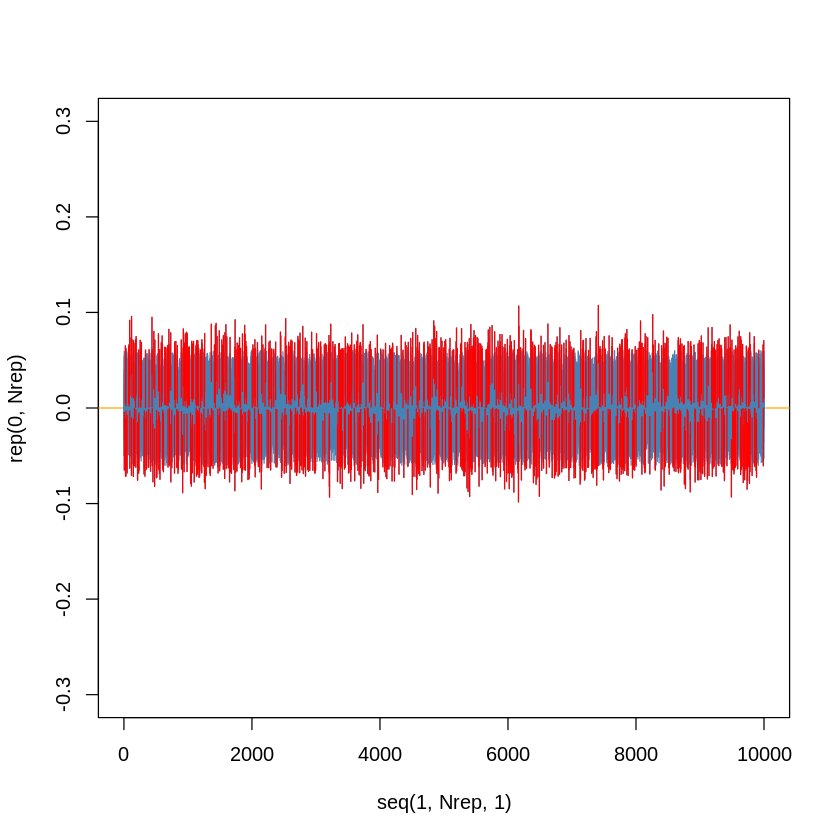

In [114]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(-0.3,0.3))

abline(h=0, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

segments(x0=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         x1=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y0=data[,'Izq'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y1=data[,'Der'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         col="red")
idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0 & der >=0)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

In [115]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0 & der >=0){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.9047

# n = 100

In [0]:
n <- 100
data <- replicate(n=Nrep, expr=IC1(rnorm(n, mean=0, sd=0.1), nivel=0.90, sigma_0=0.1 ) )
data <- t(data)
colnames(data) <- c("Izq","Der")

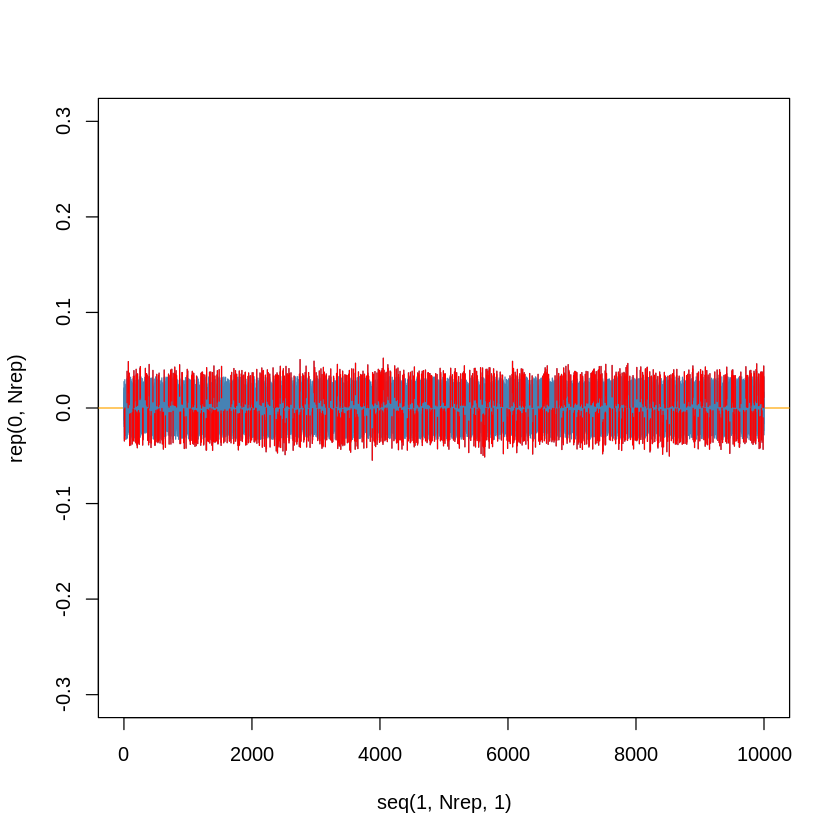

In [117]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(-0.3,0.3))

abline(h=0, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

segments(x0=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         x1=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y0=data[,'Izq'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y1=data[,'Der'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         col="red")
idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0 & der >=0)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

In [0]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0 & der >=0){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.88

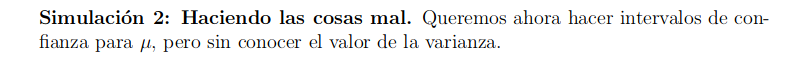

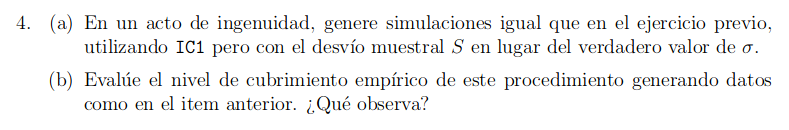

In [118]:
Nrep=100
data <- replicate(n=Nrep,
                  expr=IC1(datos <- rnorm(5, mean=0, sd=0.1), nivel=0.90, sigma_0=sd(datos) ) )
data <- t(data)
dim(data)

colnames(data) <- c("Izq","Der")

[1] 100   2

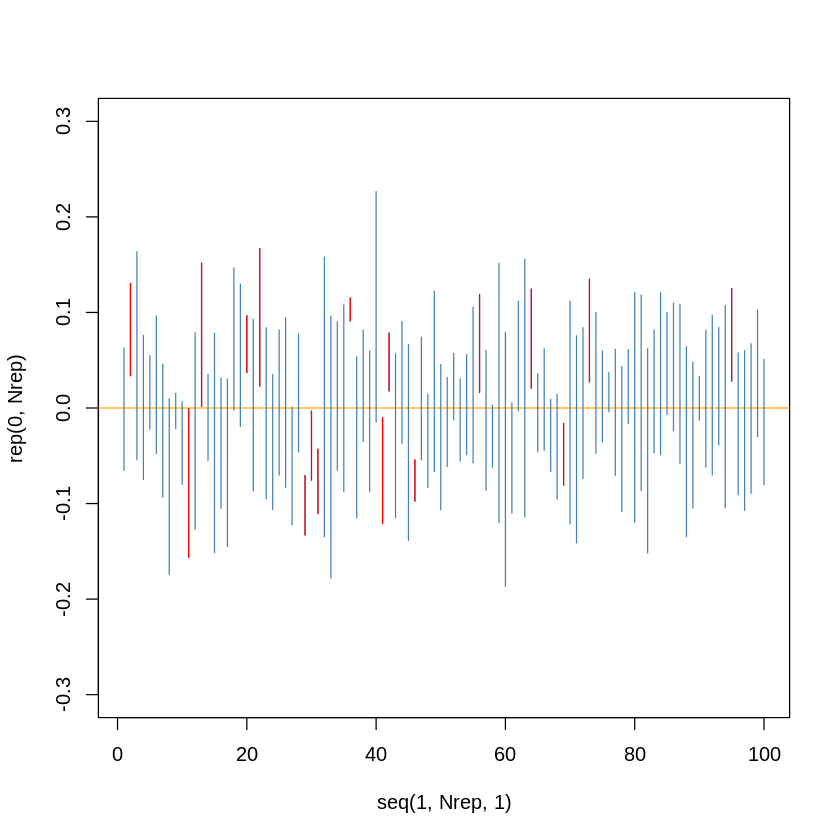

In [119]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(-0.3,0.3))

abline(h=0, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

segments(x0=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         x1=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y0=data[,'Izq'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y1=data[,'Der'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         col="red")
idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0 & der >=0)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

Los intervalos son de longitudes muy variadas.

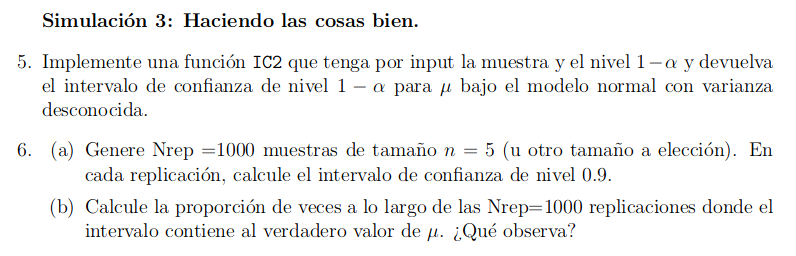

In [0]:
IC2  <- function (datos, nivel){
    # Intervalo para mu, sigma DESconocido
    #     datos : {x1, x2,..., xn}
    #     nivel : 1-alpha
    prom <- mean(datos)
    n <- length(datos)
    xp <- -qt( p=(1.0-nivel) / 2.0, df=n-1 )
    sigma <- sd(datos)
    IC <- c( prom - xp * sigma / sqrt(n) ,
             prom + xp * sigma / sqrt(n) )
    return (IC)
}

In [122]:
data <- replicate(n=Nrep,
                  expr=IC2(datos <- rnorm(10, mean=0, sd=0.1), nivel=0.90 ) )
data <- t(data)
dim(data)

colnames(data) <- c("Izq","Der")

[1] 100   2

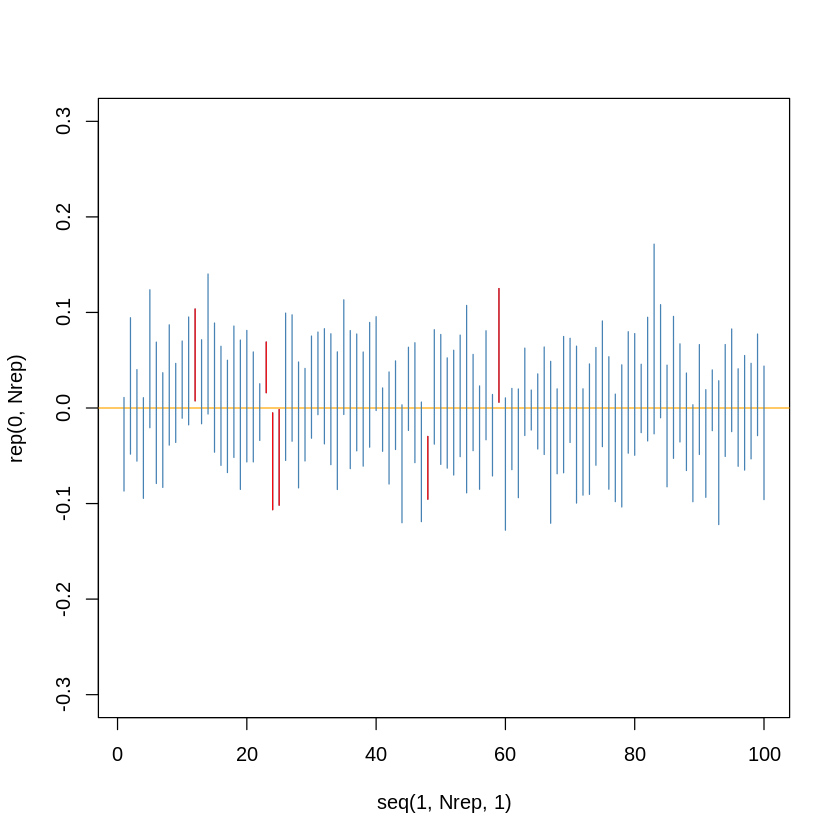

In [123]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(-0.3,0.3))

abline(h=0, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

segments(x0=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         x1=secue[data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y0=data[,'Izq'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         y1=data[,'Der'][data[,'Izq'] < 0 & data[,'Izq'] >= 0 ],
         col="red")
idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0 & der >=0)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

In [124]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0 & der >=0){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.94

Menos que antes.

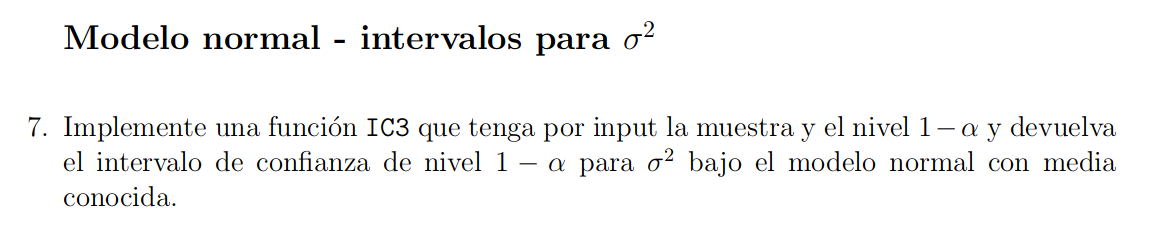

In [125]:
qchisq( p=1 - 0.05, df=20 )
qchisq( p=0.05, df=20 )

[1] 31.41043

[1] 10.85081

In [0]:
IC3  <- function (datos, nivel, mu_0){
    # Intervalo para mu, sigma DESconocido
    #     datos : {x1, x2,..., xn}
    #     nivel : 1-alpha
    n <- length(datos)
    xp_izq <- qchisq( p=1 - (1.0-nivel) / 2.0, df=n )
    xp_der <- qchisq( p=(1.0-nivel) / 2.0,     df=n )
    IC <- c( sum((datos-mu_0)**2) / xp_izq ,
             sum((datos-mu_0)**2) / xp_der )
    return (IC)
}

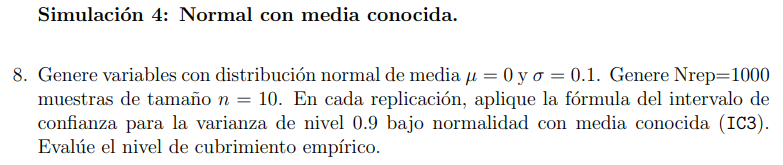

In [0]:
Nrep=100
data <- replicate(n=Nrep,
                  expr=IC3(rnorm(10, mean=0, sd=0.1),
                           nivel=0.90,
                           mu_0=0 ) )
data <- t(data)

colnames(data) <- c("Izq","Der")

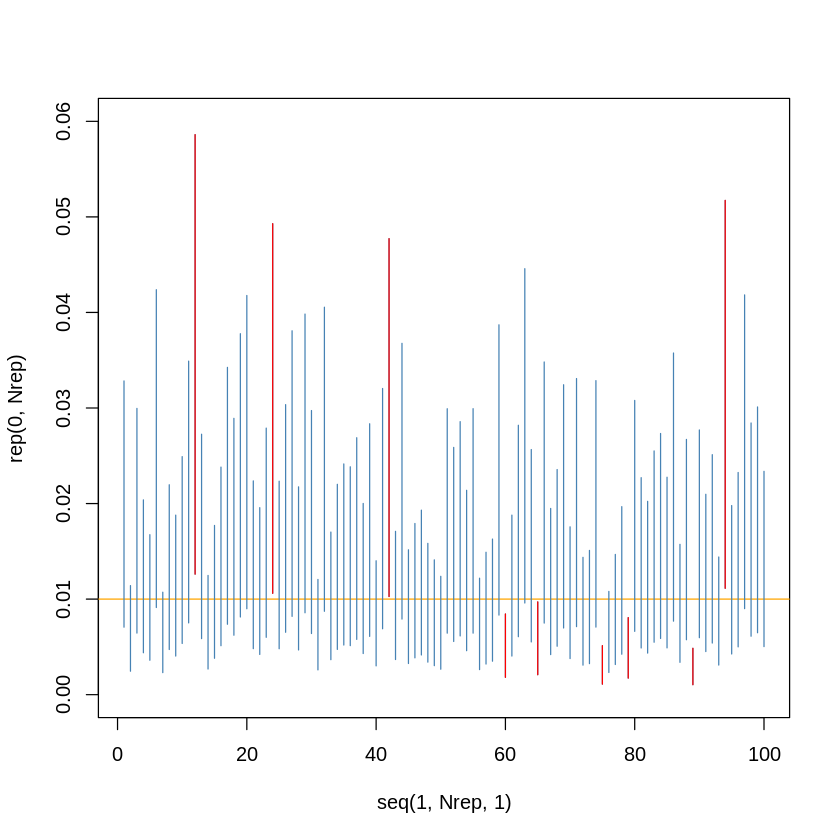

In [133]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(0.0,0.06))

abline(h=0.1**2, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0.1**2 & der >=0.1**2)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

In [134]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0.1**2 & der >=0.1**2){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.91

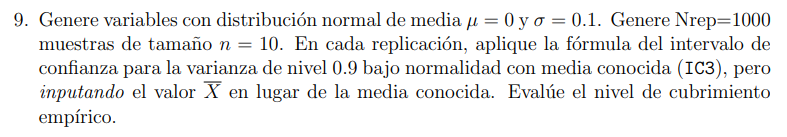

In [0]:
data <- replicate(n=Nrep,
                  expr=IC3(datos <- rnorm(10, mean=0, sd=0.1),
                                    nivel=0.90 ,
                                    mu_0=mean(datos)) )
data <- t(data)

colnames(data) <- c("Izq", "Der")

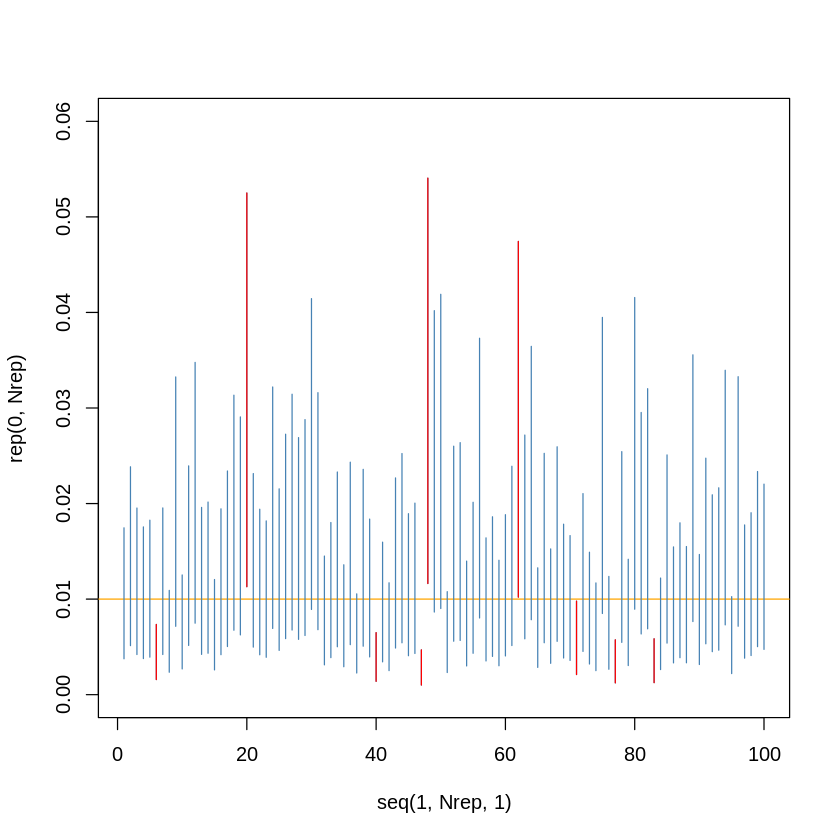

In [140]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(0.0,0.06))

abline(h=0.1**2, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 0.1**2 & der >=0.1**2)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}

In [141]:
#  Proporcion:
cont <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(izq <= 0.1**2 & der >=0.1**2){
        cont <- cont + 1
    }
}
proporcion <- cont / Nrep
proporcion

[1] 0.91

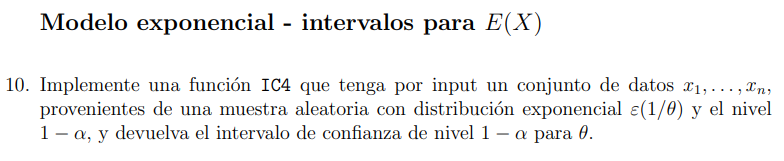

In [175]:
IC4  <- function (datos, nivel){
    # Intervalo para theta de una Exponencial(1/theta)
    #     datos : {x1, x2,..., xn}
    #     nivel : 1-alpha
    n <- length(datos)
    alpha <- 1.0 - nivel
    xp_izq <- qchisq( p = alpha/2,     df=2*n )
    xp_der <- qchisq( p = 1 - alpha/2, df=2*n )
    media <- mean(datos)
    IC <- c( (2 * sum(datos)) / xp_der,
             (2 * sum(datos)) / xp_izq  )
    return (IC)
}
IC4(datos <- rexp(100, 1/5), nivel=0.90)

[1] 4.714009 6.554912

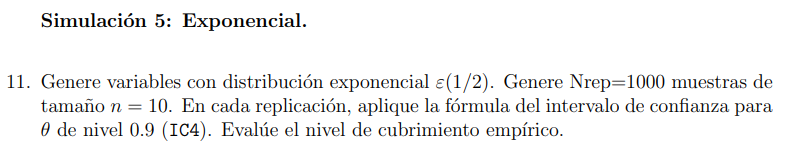

In [0]:
data <- replicate(n=Nrep,
                  expr=IC4(datos <- rexp(10, 1/2),
                                    nivel=0.90) )
data <- t(data)

colnames(data) <- c("Izq", "Der")

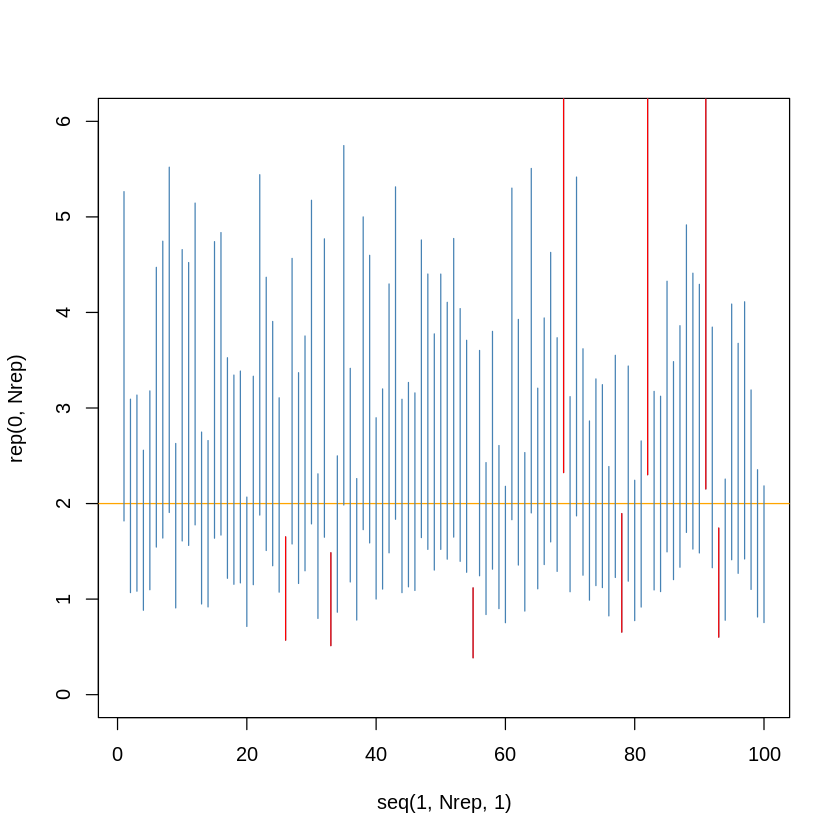

In [179]:
plot(seq(1,Nrep,1), rep(0, Nrep), col="white", ylim=c(0.0, 6))

abline(h=2, col="orange")

segments(x0=seq(1,Nrep,1),
         x1=seq(1,Nrep,1),
         y0=data[,'Izq'],
         y1=data[,'Der'],
         col="steelblue")

secue <- seq(1,Nrep,1)

idx <- 0
for (idx in 1:Nrep){
    izq <- data[idx,'Izq']
    der <- data[idx,'Der']
    if(!(izq <= 2 & der >=2)){
        segments(x0=idx,
                 x1=idx,
                 y0=izq,
                 y1=der,
                 col="red")
    }
}